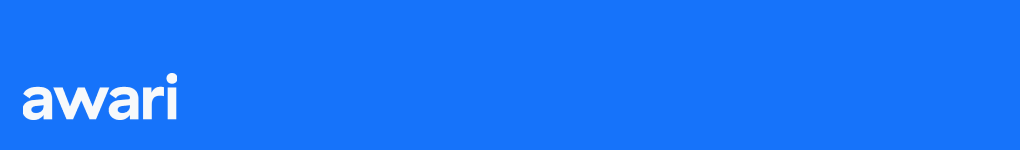

Prática da **Aula 14: Machine Learning IV**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **NLP com Spacy**

## **Introdução**

Esta prática é uma introdução ao trabalho com **linguagem natural** (às vezes chamada de "análise de texto") em Python, usando a biblioteca [**spaCy**](https://spacy.io/usage/spacy-101).

Em uma empresa, por exemplo, normalmente existem contratos (contratos de venda, acordos de trabalho, parcerias), existem faturas, existem apólices de seguro, existem regulamentos e assim por diante. Todos eles são representados como texto. Tudo isso é processável por meio de NLP.

Você pode encontrar alguns acrônimos que explicam este domínio: **processamento de linguagem natural (NLP)**, **compreensão de linguagem natural (NLU)** e **geração de linguagem natural (NLG)** ("ler texto", "entender significado", "escrever texto", respectivamente). Cada vez mais essas tarefas se sobrepõem e se combinam.

A biblioteca spaCy fornece recursos para uma ampla variedade de tarefas em linguagem natural. Tanto que se tornou uma das mais usadas nesse domínio.

Nesta prátiva, vamos usar NLP e spaCy para entender como esta área de Deep Learning funciona.

## **Instalando spaCy**

Primeiro, precisamos instalar spaCy. Podemos usar `pip` ou `conda` para isso

Na [documentação](https://spacy.io/usage) da biblioteca, há instruções detalhadas de como fazer isso para cada sistema operacional.

Em geral, a execução dos seguintes comandos deve bastar para Linux, macOS e Windows:

```
# Instalando spaCy
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download en_core_web_sm
```

Após a instalação, podemos importar a biblioteca e começar a trabalhar.

In [ ]:
# Instalando spaCy
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [ ]:
# Importando spaCy
import spacy

### **spaCy em português**

O exemplo acima usa spaCy em inglês, que é o padrão. Mas também podemos usá-lo para a língua portuguesa, da seguinte forma:

In [ ]:
# Baixando idioma português
!python -m spacy download pt

In [ ]:
# Baixando o modelo
!spacy download pt_core_news_sm

In [ ]:
nlp = spacy.load('pt_core_news_sm')
# Para voltar ao inglês, executar: nlp = spacy.load("en_core_web_sm")

### **Processando texto**

Vamos analisar uma frase simples pelo analisador de linguagem natural, para ver como funciona:

In [ ]:
text = "A chuva no Brasil ocorre mais onde tem florestas."
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.is_stop)

Primeiro criamos um [doc](https://spacy.io/api/doc) a partir do texto, que é um container para um documento e todas as suas anotações.

Em seguida, percorremos o documento para ver o que o spaCy analisou.

O resultado saiu um pouco confuso. Vamos tratar o resultado por meio de um DataFrame do [Pandas](https://pandas.pydata.org/):

In [ ]:
import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)

df

Neste caso simples, todo o documento é apenas uma frase curta. Para cada palavra nessa frase, o spaCy criou um [token](https://spacy.io/api/token) e acessamos os campos em cada token para mostrar:

- texto puro (*raw text*);
- [lemma](https://en.wikipedia.org/wiki/Lemma_(morphology)), isto é, a raiz da palavra;
- parte do discurso [*part of speech*](https://en.wikipedia.org/wiki/Part_of_speech);
- um sinalizador ("flag") para saber se a palavra é uma "stopword" (palavra irrelevante), ou seja, uma palavra comum que pode ser filtrada.

Para efeito de entendimento, podemos ter disponível:

- **lemma:** raiz da palavra;
- **pos:** parte da fala;
- **tag:** informações morfológicas, como se o verbo está no passado;
- **dep:** dependência sintática;
- **shape:** formato (maiúsculo, minúsculo, dígitos);
- **alpha:** se é alfabético;
- **stop:** se é stopword.

Em seguida, vamos usar outra biblioteca, [displaCy](https://ines.io/blog/developing-displacy), para visualizar a árvore de análise dessa frase:

In [ ]:
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True)

#### **Texto com mais de uma frase**

Tudo bem, este é um exemplo simples. Mas como lidar com várias frases?

Há recursos para detecção de limite de sentença (*sentence boundary detection (SBD)*), também conhecido como segmentação de sentença (frase), com base em outro recurso do spaCy chamado [sentencizer](https://spacy.io/api/sentencizer):

In [ ]:
text = "Estávamos todos no zoológico um dia, eu estava brincando, andando no parapeito da exposição de gorilas. Eu caí. Todos gritaram e João pulou atrás de mim, esquecendo que tinha mirtilos no bolso da frente. Os gorilas simplesmente enlouqueceram."

doc = nlp(text)

for sent in doc.sents:
    print(">", sent)

Quando spaCy cria um documento, ele usa um princípio de *tokenização "não destrutiva"* significando que os tokens, sentenças etc. são simplesmente índices em um *array* longo.

Em outras palavras, eles não dividem o fluxo de texto em pequenos pedaços. Portanto, cada sentença é um [*span*](https://spacy.io/api/span) com um índice *start* e *end* na matriz do documento:

In [ ]:
for sent in doc.sents:
    print(">", sent.start, sent.end)

Podemos indexar na matriz de documentos para extrair os tokens de uma frase:

In [ ]:
doc[22:45]

Ou simplesmente indexe em um token específico, como o verbo "enlouqueceram" na última frase:

In [ ]:
token = doc[43]
print(token.text, token.lemma_, token.pos_)

A partir daqui, podemos analisar um documento, segmentar esse documento em sentenças e observar as anotações sobre os tokens em cada sentença.

## **Adquirindo texto**

Podemos baixar páginas da web, mas obteremos  HTML e precisamos extrair o texto delas. [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) é um pacote popular para isso.

Primeiro, porém, vamos arrumar a casa:

In [ ]:
import sys
import warnings

warnings.filterwarnings("ignore")

### **Character encoding**

Veja a seguir exemplos de como usar [codecs](https://docs.python.org/3/library/codecs.html) e normalizar unicode [normalize unicode](https://docs.python.org/3/library/unicodedata.html#unicodedata.normalize).

In [ ]:
x = "Rinôçérôse screams ﬂow not unlike an encyclopædia, \
'TECHNICIÄNS ÖF SPÅCE SHIP EÅRTH THIS IS YÖÜR CÄPTÅIN SPEÄKING YÖÜR ØÅPTÅIN IS DEA̋D' to Spın̈al Tap."

type(x)

A variável `x` é uma *string* em Python:

In [ ]:
repr(x)

Sua tradução para [ASCII](http://www.asciitable.com/) é inutilizável pelos analisadores:

In [ ]:
ascii(x)

Codificar como [UTF-8](http://unicode.org/faq/utf_bom.html) não ajuda muito:

In [ ]:
x.encode('utf8')

Ignorar caracteres difíceis talvez seja uma estratégia ainda pior:

In [ ]:
x.encode('ascii', 'ignore')

No entanto, pode-se *normalizar* o texto e depois codificar…

In [ ]:
import unicodedata

unicodedata.normalize('NFKD', x).encode('ascii','ignore')

Mesmo antes dessa normalização e codificação, talvez seja necessário converter alguns caracteres explicitamente **antes** da análise (parsing). Por exemplo:

In [ ]:
x = "O céu 'acima' do porto... era da cor da 'televisão a cabo' - sintonizada no Weather Channel®"

ascii(x)

Considere os resultados para essa linha:

In [ ]:
unicodedata.normalize('NFKD', x).encode('ascii', 'ignore')

...que ainda descarta caracteres que podem ser importantes para analisar uma frase.

Portanto, uma abordagem mais avançada poderia ser:

In [ ]:
x = x.replace('“', '"').replace('”', '"')
x = x.replace("‘", "'").replace("’", "'")
x = x.replace('…', '...').replace('–', '-')

x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')
print(x)

### **Parsing HTML**

Parsing significa analisar. Na função `get_text()`, a seguir, analisaremos o HTML para encontrar todas as tags `<p/>` e, em seguida, extrairemos o texto para elas:

In [ ]:
from bs4 import BeautifulSoup
import requests
import traceback

def get_text (url):
    buf = []

    try:
        soup = BeautifulSoup(requests.get(url).text, "html.parser")

        for p in soup.find_all("p"):
            buf.append(p.get_text())

        return "\n".join(buf)
    except:
        print(traceback.format_exc())
        sys.exit(-1)

Agora vamos pegar algum texto de fontes online.
Podemos comparar licenças de código aberto hospedadas no site [Open Source Initiative](https://opensource.org/licenses/):

In [ ]:
lic = {}
lic["mit"] = nlp(get_text("https://opensource.org/licenses/MIT"))
lic["asl"] = nlp(get_text("https://opensource.org/licenses/Apache-2.0"))
lic["bsd"] = nlp(get_text("https://opensource.org/licenses/BSD-3-Clause"))

for sent in lic["bsd"].sents:
    print(">", sent)

Um caso de uso comum para o trabalho em linguagem natural é comparar textos. Por exemplo, com essas licenças de código aberto, podemos baixar o texto, analisar e comparar as métricas de [semelhança](https://spacy.io/api/doc#similarity) entre elas:

In [ ]:
pairs = [
    ["mit", "asl"],
    ["asl", "bsd"],
    ["bsd", "mit"]
]

for a, b in pairs:
    print(a, b, lic[a].similarity(lic[b]))

Isso é interessante, pois as licenças [BSD](https://opensource.org/licenses/BSD-3-Clause) e [MIT](https://opensource.org/licenses/MIT) parecem ser as mais semelhantes documentos.
Na verdade, eles estão intimamente relacionados.

É certo que houve algum texto extra incluído em cada documento devido à isenção de responsabilidade da OSI no rodapé - mas isso fornece uma aproximação razoável para comparar as licenças.

## Compreensão da linguagem natural (NLU)

Agora vamos mergulhar em alguns dos recursos do spaCy para NLU.

Dado que temos uma análise sintática de um documento, de um ponto de vista puramente gramatical, podemos extrair os [*noun chunks*](https://spacy.io/usage/linguistic-features#noun-chunks), ou seja, cada uma das frases nominais.

Para entender melhor, *noun chunks* são “frases nominais básicas”, isto é, frases planas que têm um substantivo como cabeça. Você pode pensar em pedaços de substantivos como um substantivo mais as palavras que descrevem o substantivo.

Por exemplo, "a grama verde pródiga" ou "o maior fundo de tecnologia do mundo". Para obter os pedaços de substantivo em um documento, basta iterar sobre.

In [ ]:
text = "Steve Jobs e Steve Wozniak fundaram a Apple Computer em 3 de janeiro de 1977, em Cupertino, Califórnia."
doc = nlp(text)

for chunk in doc.noun_chunks:
    print(chunk.text)

Os sintagmas nominais em uma frase geralmente fornecem mais conteúdo informativo, como um simples filtro usado para reduzir um documento longo em uma representação mais "destilada".

Podemos levar essa abordagem adiante e identificar Entidades [named entities](https://spacy.io/usage/linguistic-features#named-entities) dentro do texto, ou seja, os nomes próprios:

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Voltamos a usar a biblioteca displaCy:

In [ ]:
displacy.render(doc, style="ent", jupyter=True)

Se você estiver trabalhando com aplicativos de [gráfico de conhecimento](https://www.akbc.ws/) e outros [dados vinculados](http://linkeddata.org/), seu desafio é construir links entre as entidades nomeadas em um documento e outras informações relacionadas às entidades – que é chamado de [entity linking](http://nlpprogress.com/english/entity_linking.html).

Identificar as entidades nomeadas em um documento é o primeiro passo nesse tipo específico de trabalho de IA.

Por exemplo, dado o texto acima, pode-se vincular a entidade nomeada `Steve Wozniak` a uma [pesquisa na DBpedia](http://dbpedia.org/page/Steve_Wozniak).

## **Considerações finais**

Cinco anos atrás, se você perguntasse sobre código aberto em Python para linguagem natural, uma resposta padrão de muitas pessoas que trabalham em ciência de dados seria [NLTK](https://www.nltk.org/).

Esse projeto inclui quase tudo, menos a pia da cozinha, e tem componentes relativamente acadêmicos.

Outro projeto popular de linguagem natural é o [CoreNLP](https://stanfordnlp.github.io/CoreNLP/) de Stanford.

Também bastante acadêmico, embora poderoso, embora o _CoreNLP_ possa ser um desafio para integrar com outros softwares para uso em produção.

Porém, há alguns anos, tudo em linguagem natural começou a mudar. Os dois principais autores de _spaCy_ -- [Matthew Honnibal](https://twitter.com/honnibal) e [Ines Montani](https://twitter.com/_inesmontani) -- lançaram o projeto em 2015 e a adoção da indústria foi rápido.

Eles se concentraram em uma abordagem _opinativa_ (faça o que é necessário, faça bem, nem mais, nem menos) que forneceu integração simples e rápida em fluxos de trabalho de ciência de dados em Python, bem como execução mais rápida e melhor precisão do que as alternativas.

Com base nessas prioridades, _spaCy_ se torna o oposto de _NLTK_.

Desde 2015, o _spaCy_ tem se concentrado consistentemente em ser um projeto de código aberto (ou seja, dependendo de sua comunidade para direções, integrações etc.) e em ser um software de nível comercial (não pesquisa acadêmica).

Dito isso, a _spaCy_ foi rápida em incorporar os avanços da SOTA no aprendizado de máquina, tornando-se efetivamente um canal para mover a pesquisa para a indústria.

É importante notar que o aprendizado de máquina para linguagem natural teve um grande impulso em meados dos anos 2000, quando o Google começou a ganhar competições internacionais de tradução de idiomas.

Outra grande mudança ocorreu durante 2017-2018 quando, após os muitos sucessos do _deep learning_, essas abordagens começaram a superar os modelos anteriores de aprendizado de máquina.

Por exemplo, veja o trabalho [ELMo](https://arxiv.org/abs/1802.05365) sobre _language embedding_ por Allen AI, seguido por [BERT](https://ai.googleblog.com/2018/11/open -sourcing-bert-state-of-art-pre.html) do Google e, mais recentemente, [ERNIE](https://medium.com/syncedreview/baidus-ernie-tops-google-s-bert-in-chinese -nlp-tasks-d6a42b49223d) por Baidu -- em outras palavras, os gigantes dos mecanismos de busca do mundo presentearam o resto de nós com um repertório da Vila Sésamo de modelos de linguagem incorporados de código aberto baseados em aprendizado profundo, que agora é _estado do mundo arte_ (SOTA).

Falando nisso, para acompanhar SOTA para linguagem natural, fique de olho em [NLP-Progress](http://nlpprogress.com/) e [Papers with Code](https://paperswithcode.com/sota).

Os casos de uso da linguagem natural mudaram drasticamente nos últimos anos, depois que as técnicas de aprendizado profundo surgiram.

Por volta de 2014, um tutorial de linguagem natural em Python pode ter mostrado _contagem de palavras_ ou _pesquisa de palavras-chave_ ou _detecção de sentimentos_ onde os casos de uso de destino eram relativamente abaixo do esperado.

Pós 2020, estamos falando de analisar milhares de documentos para contratos de fornecedores em uma otimização da cadeia de suprimentos industrial... ou centenas de milhões de documentos para segurados de uma seguradora, ou zilhões de documentos sobre divulgações financeiras.

O trabalho de linguagem natural mais contemporâneo tende a ser em NLU, muitas vezes para apoiar a construção de _gráficos de conhecimento,_ e cada vez mais em NLG, onde um grande número de documentos semelhantes pode ser resumido em escala humana.

O [spaCy Universe](https://spacy.io/universe) é um ótimo lugar para verificar aprofundamentos em casos de uso específicos e ver como esse campo está evoluindo. Algumas seleções deste "universo" incluem:

 - [Blackstone](https://spacy.io/universe/project/blackstone) – analisando textos legais não estruturados
 - [Kindred](https://spacy.io/universe/project/kindred) – extraindo entidades de textos biomédicos (por exemplo, Pharma)
 - [mordecai](https://spacy.io/universe/project/mordecai) – analisando informações geográficas
 - [Prodigy](https://spacy.io/universe/project/prodigy) – anotação humana no loop para rotular conjuntos de dados
 - [spacy-raspberry](https://spacy.io/universe/project/spacy-raspberry) – Imagem do Raspberry PI para execução de _spaCy_ e aprendizado profundo em dispositivos de borda
 - [Rasa NLU](https://spacy.io/universe/project/rasa) – Integração Rasa para aplicativos de voz

Além disso, alguns itens super novos para mencionar:

  - [spacy-pytorch-transformers](https://explosion.ai/blog/spacy-pytorch-transformers) para ajustar (ou seja, usar _transfer learning_ com) os personagens e amigos da Vila Sésamo: BERT, GPT-2, XLNet , etc
  - [spaCy IRL 2019](https://irl.spacy.io/2019/) conferência – confira os vídeos das palestras!

Há muito mais que pode ser feito com _spaCy_, é claro.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**